In [2]:
import pandas as pd
pd.set_option('display.max_columns', 1000) #replace n with the number of columns you want to see completely
pd.set_option('display.max_rows', 1000) #replace n with the number of rows you want to see completely

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Read the CSV file
Data_df = pd.read_csv("./Data_df_stdScaler.csv")

In [4]:
Data_df.head()


,Age,Sex,HGB,WBC,PLT,HCT,Neutro,Mono,Diagnosis
0,41.0,female,0.251887,-0.109213,-0.568371,0.666063,-0.613704,-0.237428,normal
1,40.0,male,0.077459,-0.021415,-0.637539,0.666063,-0.613704,-0.237428,normal
2,20.0,male,-0.751075,-0.295476,-0.732459,0.666063,-0.613704,-0.237428,normal
3,28.0,female,0.077459,-0.174856,-0.766307,0.666063,-0.613704,-0.237428,normal
4,22.0,female,0.469923,0.192747,-0.679480,0.666063,-0.613704,-0.237428,normal


In [5]:
Data_df_calCorr = Data_df[["HGB", "WBC", "PLT", "HCT", "Neutro", "Mono"]]

In [182]:

# คำนวณ correlation matrix
xCorr = Data_df_calCorr.copy()
xCorr = xCorr.drop(columns=[])
correlation_matrix = xCorr.corr()

high_corr_columns = set()   # สร้างเซตว่างที่จะใช้เก็บชื่อคอลัมน์

# ลบคอลัมน์ที่มี correlation มากกว่า 0.6
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            colname = correlation_matrix.columns[i]
            high_corr_columns.add(colname)
            
print(f"can drop --- \n")
high_corr_columns = list(high_corr_columns)
        
for idx, i in enumerate(high_corr_columns):
    print(f"Index: [{idx}]: {i}\n")



can drop --- 

Index: [0]: HCT



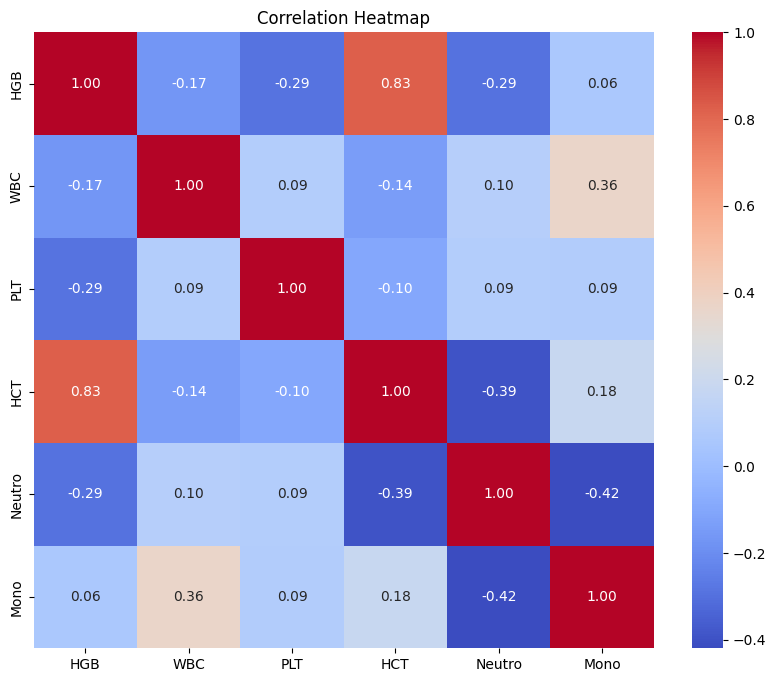

In [7]:
# สร้าง correlation matrix
correlation_matrix = xCorr.corr()

# สร้าง heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
Data_df = Data_df.drop(columns='HCT')

In [8]:
Data_df.head()

,Age,Sex,HGB,WBC,PLT,Neutro,Mono,Diagnosis
0,41.0,female,0.251887,-0.109213,-0.568371,-0.613704,-0.237428,normal
1,40.0,male,0.077459,-0.021415,-0.637539,-0.613704,-0.237428,normal
2,20.0,male,-0.751075,-0.295476,-0.732459,-0.613704,-0.237428,normal
3,28.0,female,0.077459,-0.174856,-0.766307,-0.613704,-0.237428,normal
4,22.0,female,0.469923,0.192747,-0.679480,-0.613704,-0.237428,normal


In [7]:
count_per_diag = Data_df['Diagnosis'].value_counts()
print(count_per_diag)

Diagnosis
normal           869
probable CAB     623
dengue           538
confirmed CAB    319
anemia           275
Name: count, dtype: int64


---

In [8]:
df_X = Data_df.drop(columns='Diagnosis')
df_y = Data_df[["Diagnosis"]]

In [12]:
print(df_X.head())
print(df_y.head())

    Age     Sex       HGB       WBC       PLT    Neutro      Mono
0  41.0  female  0.251887 -0.109213 -0.568371 -0.613704 -0.237428
1  40.0    male  0.077459 -0.021415 -0.637539 -0.613704 -0.237428
2  20.0    male -0.751075 -0.295476 -0.732459 -0.613704 -0.237428
3  28.0  female  0.077459 -0.174856 -0.766307 -0.613704 -0.237428
4  22.0  female  0.469923  0.192747 -0.679480 -0.613704 -0.237428
  Diagnosis
0    normal
1    normal
2    normal
3    normal
4    normal


------

In [9]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.options.display.float_format = '{:.3f}'.format

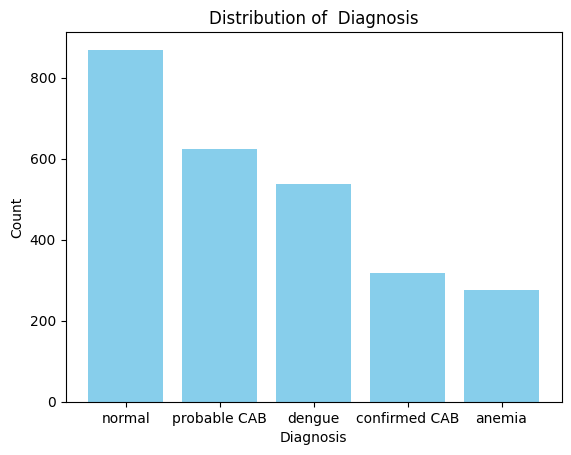

In [14]:
# Count the occurrences of each Bean_grade
counts = df_y['Diagnosis'].value_counts()

# Plot the bar graph
plt.bar(counts.index, counts.values, color='skyblue')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of  Diagnosis')
plt.show()


In [10]:
# ทำ One-Hot Encoding สำหรับคอลัมน์ที่ไม่ใช่ตัวเลข
df_y_oneHot = pd.get_dummies(df_y)

# แสดง DataFrame ที่ได้หลังจาก One-Hot Encoding
print("One-Hot Encoded DataFrame:")

df_y_oneHot

One-Hot Encoded DataFrame:


,Diagnosis_anemia,Diagnosis_confirmed CAB,Diagnosis_dengue,Diagnosis_normal,Diagnosis_probable CAB
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
2619,False,False,False,True,False
2620,False,False,False,True,False
2621,False,False,False,True,False
2622,False,False,False,True,False


In [11]:
# ทำ One-Hot Encoding สำหรับคอลัมน์ที่ไม่ใช่ตัวเลข
df_X_oneHot = pd.get_dummies(df_X)

# แสดง DataFrame ที่ได้หลังจาก One-Hot Encoding
print("One-Hot Encoded DataFrame:")

df_X_oneHot

One-Hot Encoded DataFrame:


,Age,HGB,WBC,PLT,Neutro,Mono,Sex_female,Sex_male
0,41.000,0.252,-0.109,-0.568,-0.614,-0.237,True,False
1,40.000,0.077,-0.021,-0.638,-0.614,-0.237,False,True
2,20.000,-0.751,-0.295,-0.732,-0.614,-0.237,False,True
3,28.000,0.077,-0.175,-0.766,-0.614,-0.237,True,False
4,22.000,0.470,0.193,-0.679,-0.614,-0.237,True,False
...,...,...,...,...,...,...,...,...
2619,33.000,0.252,-0.039,-0.657,0.086,-0.780,True,False
2620,23.000,0.426,0.234,-0.710,1.695,-0.607,True,False
2621,26.000,-0.053,0.074,-0.680,0.597,-0.763,True,False
2622,42.000,0.165,-0.007,-0.730,0.420,-0.798,True,False


In [12]:
# แบ่งข้อมูลเป็น Train set และ Test set โดยให้ Test set มีขนาด 20%
X_train_ontHot, X_test_ontHot, y_train_ontHot, y_test_ontHot = train_test_split(df_X_oneHot, df_y_oneHot, test_size=0.3, random_state=42)

In [13]:
print(X_train_ontHot.shape)
print(y_train_ontHot.shape)


(1836, 8)
(1836, 5)


In [ ]:
[1836, 9180]

-------

<h2> Random Forest Model<h>

In [30]:
import time

# สร้างตัวแปรเพื่อเก็บโมเดลที่มีประสิทธิภาพสูงสุดสำหรับแต่ละเกณฑ์
best_entropy_model = None
best_gini_model = None
best_entropy_accuracy = 0
best_gini_accuracy = 0

ASM_func_values = ['entropy', 'gini']
max_depth_values = [6,7,8,9,10,20,40,80,200,300,500,1000,2000,4000,8000,10000] 

# Train Model และคำนวณค่า accuracy_score สำหรับแต่ละพารามิเตอร์
for criterion in ASM_func_values:
    for n_estimators in max_depth_values:
        # เริ่มจับเวลาก่อนการ fit
        start_time = time.time()
        
        # สร้างและ Train Model
        model = RandomForestClassifier(criterion=criterion, n_estimators=n_estimators, random_state=42)
        model.fit(X_train_ontHot, y_train_ontHot)
        
        # หยุดจับเวลาหลังจากการ fit เสร็จสิ้น
        end_time = time.time()
        
        # Test Model ด้วยข้อมูล Test
        y_pred = model.predict(X_test_ontHot)
        
        # คำนวณค่า accuracy_score
        accuracy = accuracy_score(y_test_ontHot, y_pred)
        
        # ตรวจสอบว่าเป็นโมเดลที่มีประสิทธิภาพสูงสุดหรือไม่
        if criterion == 'entropy' and accuracy > best_entropy_accuracy:
            best_entropy_accuracy = accuracy
            best_entropy_model = (model, n_estimators)
        elif criterion == 'gini' and accuracy > best_gini_accuracy:
            best_gini_accuracy = accuracy
            best_gini_model = (model, n_estimators)
        
        # แสดงค่า accuracy_score
        
        # แสดง Model Performance: Classification Report
        
        print()
        print(f"-----------------n_estimators= {n_estimators}-----------------")
        print("Classification Report:")
        print(classification_report(y_test_ontHot, y_pred, zero_division=1))
        print()
        print(f"Model with criterion={criterion}, n_estimators={n_estimators}: Accuracy = {accuracy}")
        
        # แสดงเวลาที่ใช้ในการ fit
        print(f"Time taken to fit: {end_time - start_time} seconds")
        
        print()
        print("---------------------------------------------------------------")
        print()

# แสดงโมเดลที่มีประสิทธิภาพสูงสุดสำหรับแต่ละเกณฑ์และจำนวนต้นไม้
print("Best Models:")
print("Entropy Criterion:")
print("Model:", best_entropy_model[0])
print("n_estimators:", best_entropy_model[1])
print()
print("Gini Criterion:")
print("Model:", best_gini_model[0])
print("n_estimators:", best_gini_model[1])



-----------------n_estimators= 6-----------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.71      0.37      0.49        92
           2       0.82      0.68      0.75       165
           3       0.97      0.90      0.93       244
           4       0.76      0.48      0.59       200

   micro avg       0.88      0.70      0.78       788
   macro avg       0.85      0.69      0.75       788
weighted avg       0.86      0.70      0.76       788
 samples avg       0.90      0.70      0.70       788


Model with criterion=entropy, n_estimators=6: Accuracy = 0.6979695431472082
Time taken to fit: 0.1000216007232666 seconds

---------------------------------------------------------------


-----------------n_estimators= 7-----------------
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        87
           

In [31]:
from sklearn.tree import plot_tree

In [19]:
# สร้างและ Train Model สำหรับ entropy 

best_entropy_model = RandomForestClassifier(criterion='entropy', n_estimators=2000, random_state=42)
best_entropy_model.fit(X_train_ontHot, y_train_ontHot)
# สร้างและ Train Model สำหรับ gini

best_gini_model = RandomForestClassifier(criterion='gini', n_estimators=1000, random_state=42)
best_gini_model.fit(X_train_ontHot, y_train_ontHot)




RandomForestClassifier(n_estimators=1000, random_state=42)

In [20]:
y_test_ontHot.columns

Index(['Diagnosis_anemia', 'Diagnosis_confirmed CAB', 'Diagnosis_dengue',
       'Diagnosis_normal', 'Diagnosis_probable CAB'],
      dtype='object')

In [21]:
# แสดง best_entropy_model Performance: Classification Report
y_pred_en = best_entropy_model.predict(X_test_ontHot)
accuracy_en = accuracy_score(y_test_ontHot, y_pred_en)
print()
print(f"-----------------Best Entropy Model-----------------")
print("Classification Report:")
print(classification_report(y_test_ontHot, y_pred_en, zero_division=1))
print()
print(f"Best Entropy Model, n_estimators= 2000 : Accuracy = {accuracy_en}")
        
print()
print("---------------------------------------------------------------")
print()

# แสดง best_gini_model Performance: Classification Report
y_pred_gini = best_gini_model.predict(X_test_ontHot)
accuracy_gini = accuracy_score(y_test_ontHot, y_pred_gini)
print()
print(f"-----------------Best GiNi Model-----------------")
print("Classification Report:")
print(classification_report(y_test_ontHot, y_pred_gini, zero_division=1))
print()
print(f"Best GiNi Model , n_estimators= 1000: Accuracy = {accuracy_gini}")
             
print()
print("---------------------------------------------------------------")
print()


-----------------Best Entropy Model-----------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.85      0.49      0.62        92
           2       0.86      0.81      0.84       165
           3       0.97      0.99      0.98       244
           4       0.87      0.76      0.81       200

   micro avg       0.92      0.84      0.88       788
   macro avg       0.91      0.81      0.85       788
weighted avg       0.91      0.84      0.87       788
 samples avg       0.93      0.84      0.84       788


Best Entropy Model, n_estimators= 2000 : Accuracy = 0.8362944162436549

---------------------------------------------------------------


-----------------Best GiNi Model-----------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        87
           1       0.84      0.46      0.59        92
     

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
y_test_npArray = np.array(y_test_ontHot)

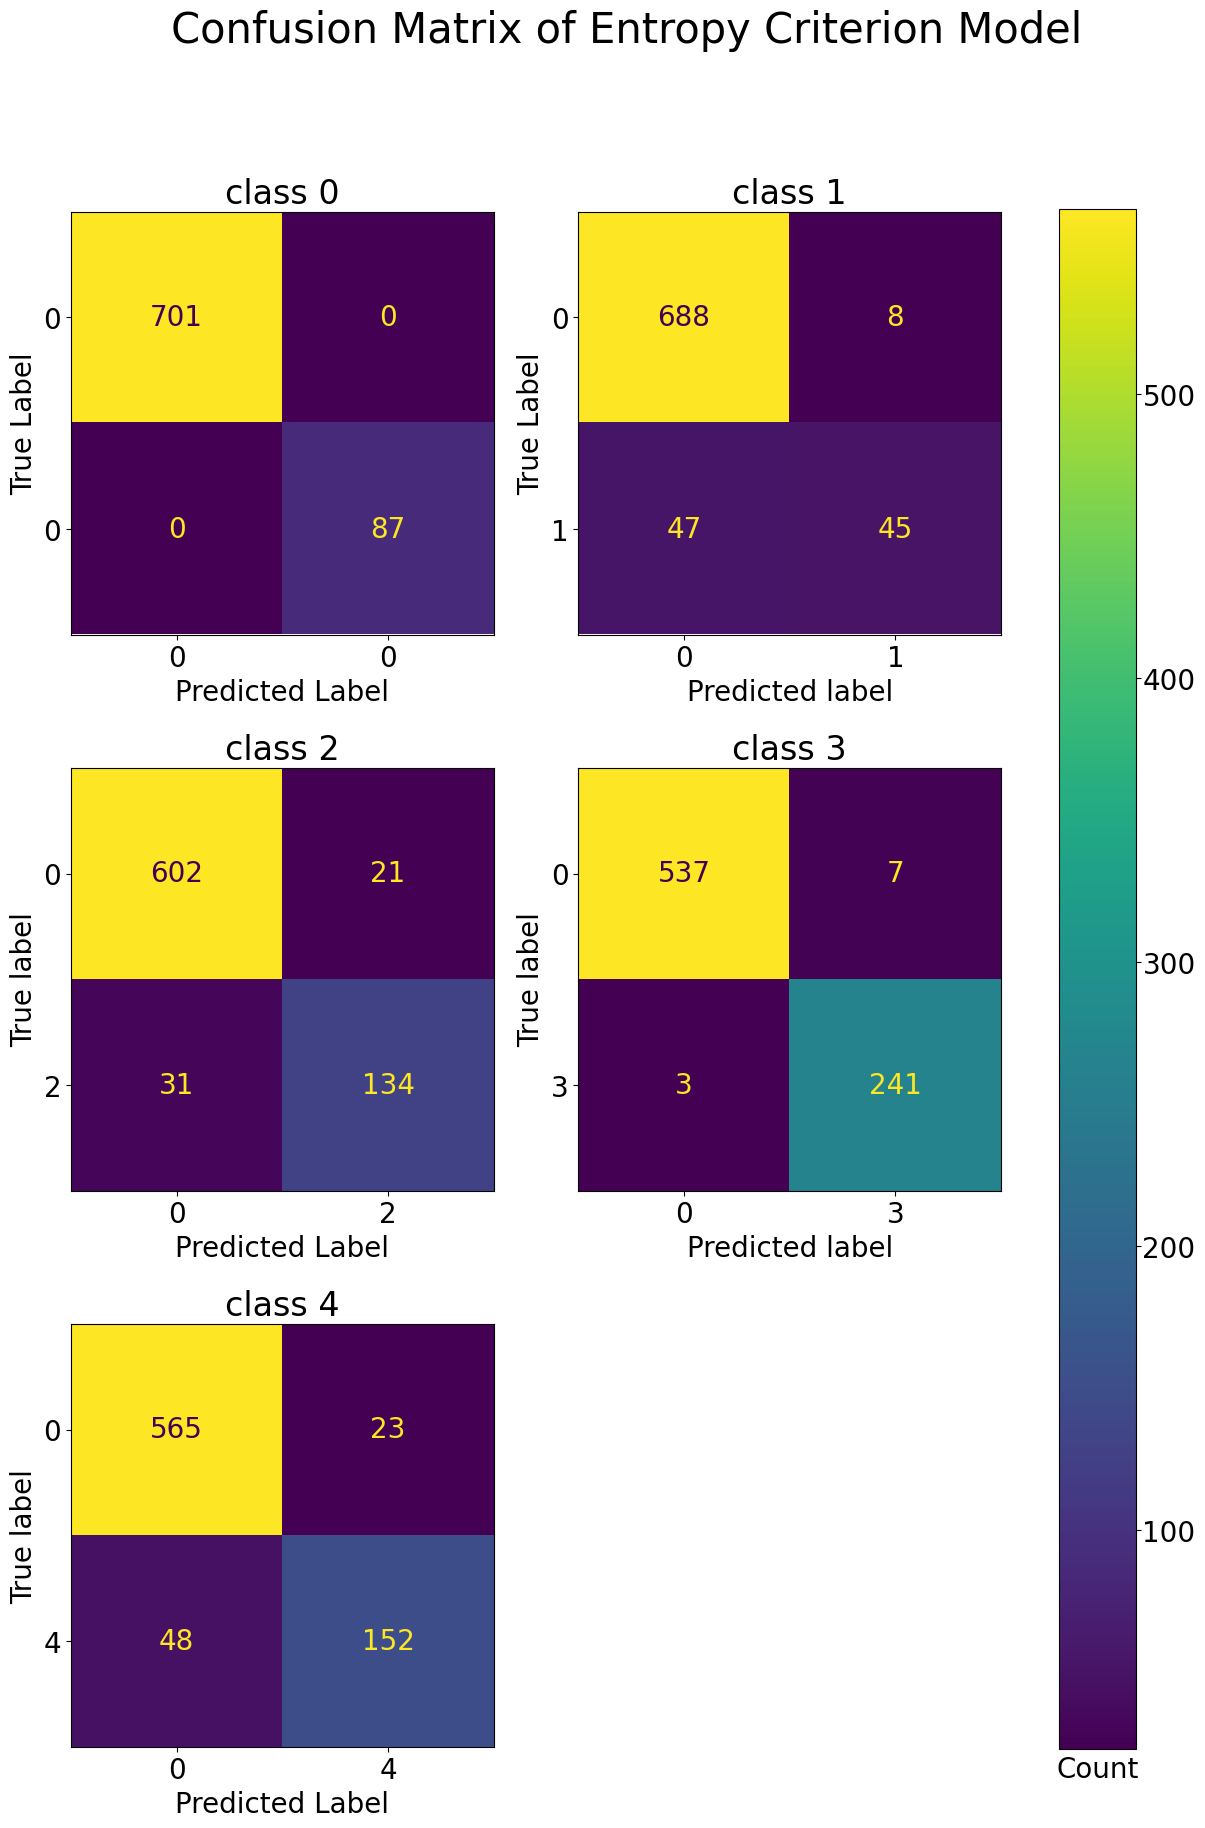

In [177]:

# สร้าง subplot ในขนาดที่เหมาะสม
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# เรียงลำดับ axes ให้อยู่ในรูปแบบแถว-คอลัมน์
axes = axes.ravel()

# ตั้งค่า font size เริ่มต้น
plt.rcParams['font.size'] = 20
# วน loop ในรูปแบบแถวและคอลัมน์
for i, ax in enumerate(axes):
    # ตรวจสอบว่าเลขรูปที่ i มีอยู่ในขอบเขตข้อมูลหรือไม่
    if i < y_test_npArray.shape[1]:
        # เลือกชุดข้อมูลที่ i และทำนาย
        y_test_class_i = y_test_npArray[:, i]
        y_pred_class_i = y_pred_en[:, i]

        # สร้าง confusion matrix สำหรับชุดข้อมูลที่ i
        disp = ConfusionMatrixDisplay(
            confusion_matrix(y_test_class_i, y_pred_class_i), display_labels=[0, i]
        )
        # พล็อต confusion matrix ลงใน subplot ที่เซ็ตไว้
        disp.plot(ax=ax, values_format=".4g")
        # ตั้งชื่อสำหรับแต่ละ subplot
        ax.set_title(f"class {i}")
        # ตั้งชื่อแกน x เฉพาะสำหรับรูปที่อยู่บนสุดของแต่ละคอลัมน์
        if i % 2 == 0:
            ax.set_xlabel("Predicted Label")
        # ตั้งชื่อแกน y เฉพาะสำหรับรูปที่อยู่บนสุดของแต่ละแถว
        if i < 2:
            ax.set_ylabel("True Label")
        # ลบ colorbar ทิ้ง
        disp.im_.colorbar.remove()
    else:
        # ถ้าไม่มีข้อมูลให้ซ่อน subplot
        ax.axis("off")

# ปรับแต่งระยะห่างระหว่าง subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.suptitle("Confusion Matrix of Entropy Criterion Model ", fontsize=30)
# เพิ่ม colorbar ที่ตำแหน่งของ subplot ล่างขวา
cbar = fig.colorbar(disp.im_, ax=axes)
cbar.ax.set_xlabel('Count', fontsize=20)  # ตั้งชื่อ colorbar
cbar.ax.tick_params(pad=1)  # ปรับระยะห่างระหว่าง colorbar กับ subplot
plt.show()


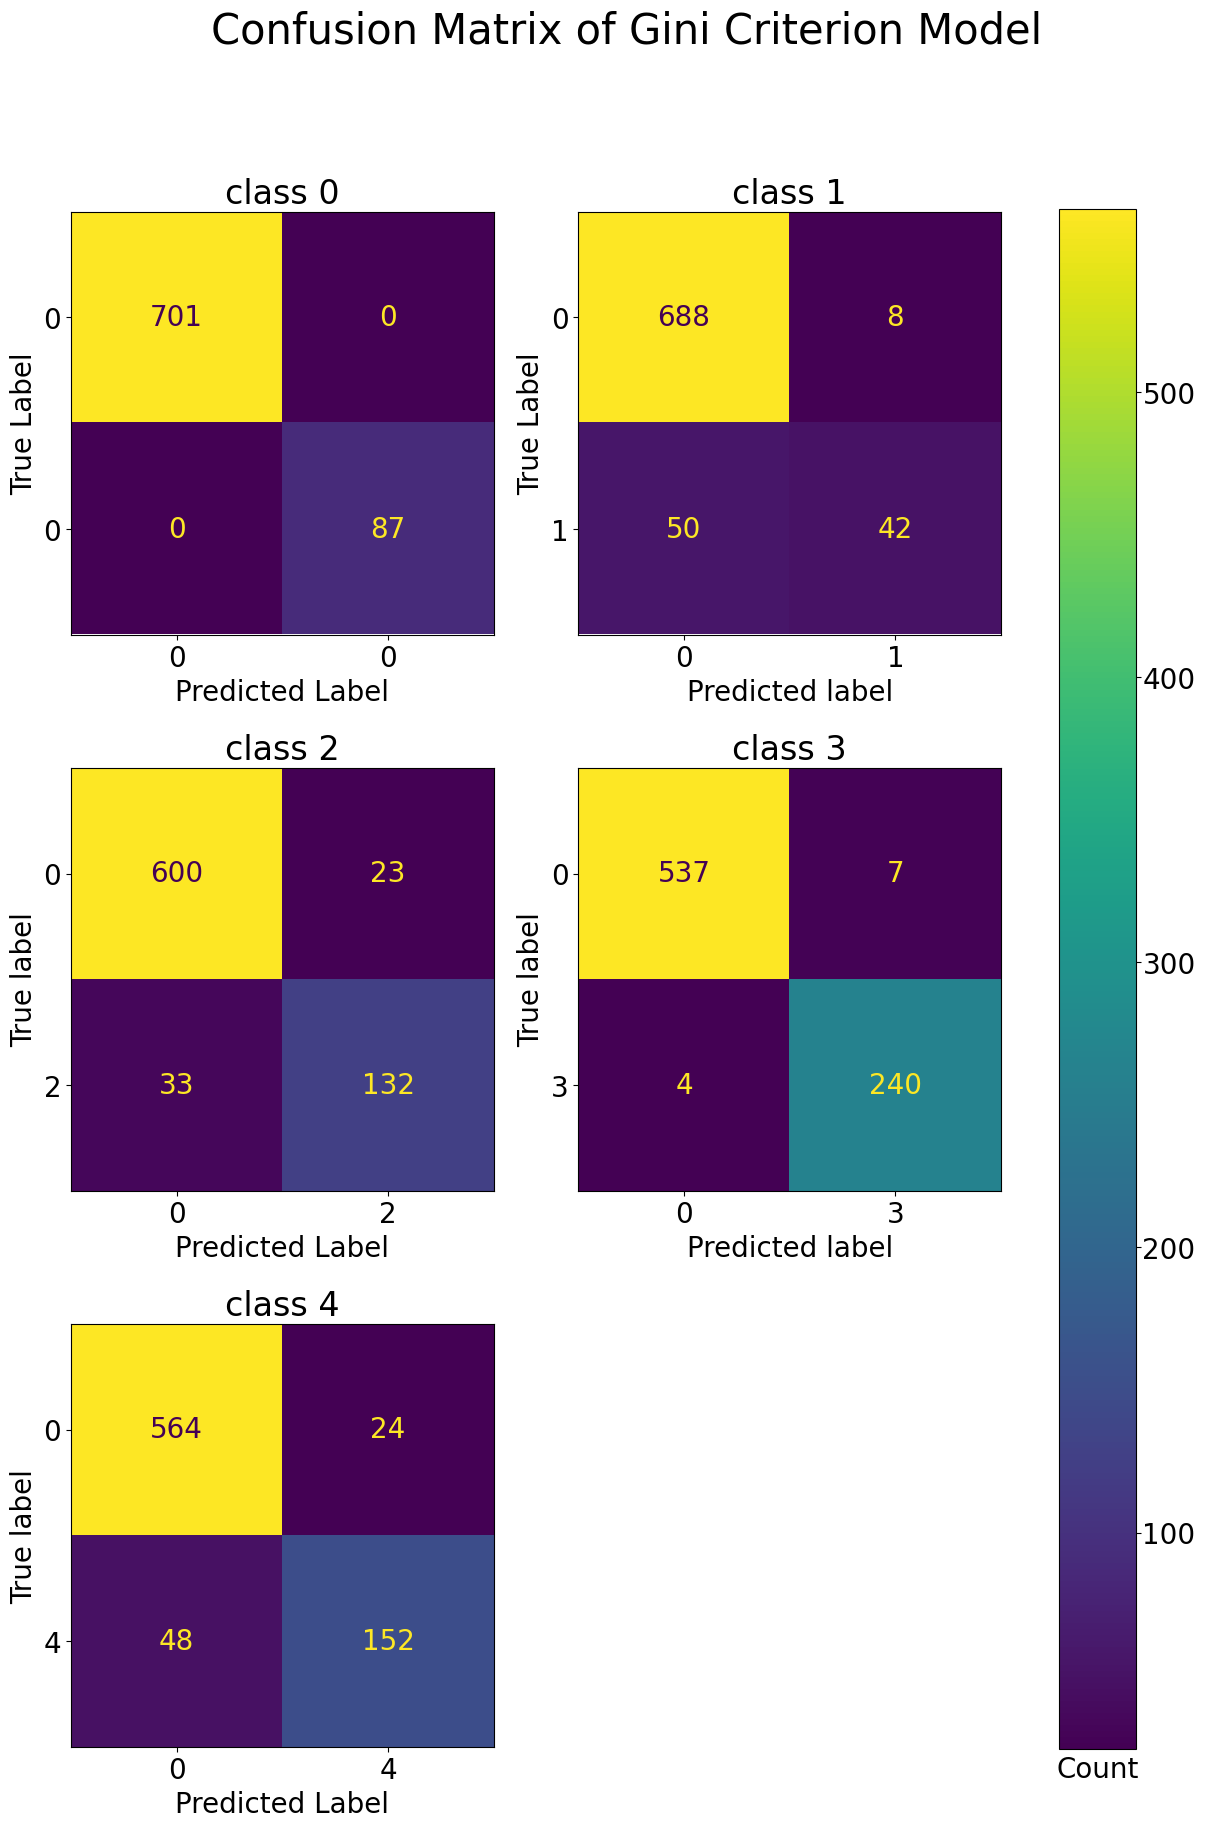

In [178]:

# สร้าง subplot ในขนาดที่เหมาะสม
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# เรียงลำดับ axes ให้อยู่ในรูปแบบแถว-คอลัมน์
axes = axes.ravel()

# ตั้งค่า font size เริ่มต้น
plt.rcParams['font.size'] = 20
# วน loop ในรูปแบบแถวและคอลัมน์
for i, ax in enumerate(axes):
    # ตรวจสอบว่าเลขรูปที่ i มีอยู่ในขอบเขตข้อมูลหรือไม่
    if i < y_test_npArray.shape[1]:
        # เลือกชุดข้อมูลที่ i และทำนาย
        y_test_class_i = y_test_npArray[:, i]
        y_pred_class_i = y_pred_gini[:, i]

        # สร้าง confusion matrix สำหรับชุดข้อมูลที่ i
        disp = ConfusionMatrixDisplay(
            confusion_matrix(y_test_class_i, y_pred_class_i), display_labels=[0, i]
        )
        # พล็อต confusion matrix ลงใน subplot ที่เซ็ตไว้
        disp.plot(ax=ax, values_format=".4g")
        # ตั้งชื่อสำหรับแต่ละ subplot
        ax.set_title(f"class {i}")
        # ตั้งชื่อแกน x เฉพาะสำหรับรูปที่อยู่บนสุดของแต่ละคอลัมน์
        if i % 2 == 0:
            ax.set_xlabel("Predicted Label")
        # ตั้งชื่อแกน y เฉพาะสำหรับรูปที่อยู่บนสุดของแต่ละแถว
        if i < 2:
            ax.set_ylabel("True Label")
        # ลบ colorbar ทิ้ง
        disp.im_.colorbar.remove()
    else:
        # ถ้าไม่มีข้อมูลให้ซ่อน subplot
        ax.axis("off")

# ปรับแต่งระยะห่างระหว่าง subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.suptitle("Confusion Matrix of Gini Criterion Model ", fontsize=30)
# เพิ่ม colorbar ที่ตำแหน่งของ subplot ล่างขวา
cbar = fig.colorbar(disp.im_, ax=axes)
cbar.ax.set_xlabel('Count', fontsize=20)  # ตั้งชื่อ colorbar
cbar.ax.tick_params(pad=1)  # ปรับระยะห่างระหว่าง colorbar กับ subplot
plt.show()


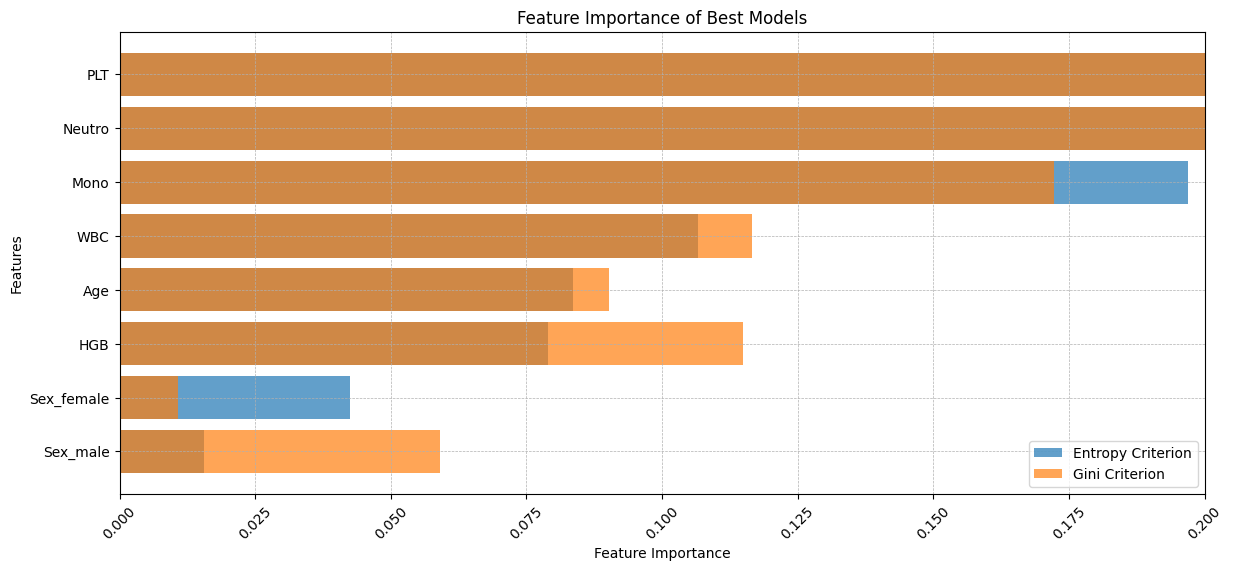

In [ ]:
# เลือกเฉพาะ feature importance ที่สอดคล้องกับ features ที่มี
entropy_feature_importance = best_entropy_model[0].feature_importances_[:len(X_train_ontHot.columns)]
gini_feature_importance = best_gini_model[0].feature_importances_[:len(X_train_ontHot.columns)]

# เรียงลำดับ features และ feature importance ให้ตรงกัน
sorted_indices = np.argsort(entropy_feature_importance)
sorted_features = np.array(X_train_ontHot.columns)[sorted_indices]
sorted_entropy_feature_importance = entropy_feature_importance[sorted_indices]
sorted_gini_feature_importance = gini_feature_importance[sorted_indices]

# พล็อตกราฟแท่งของ feature importance
plt.figure(figsize=(14, 6))
plt.barh(sorted_features, sorted_entropy_feature_importance, label='Entropy Criterion', alpha=0.7)
plt.barh(sorted_features, sorted_gini_feature_importance, label='Gini Criterion', alpha=0.7)
plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Best Models')
plt.grid(True, linestyle='--', linewidth=0.5)  # เพิ่มเส้นกริด
plt.xlim(0, 0.2)  # กำหนดช่วงของแกน y
plt.legend()
plt.xticks(rotation=45)
plt.show()

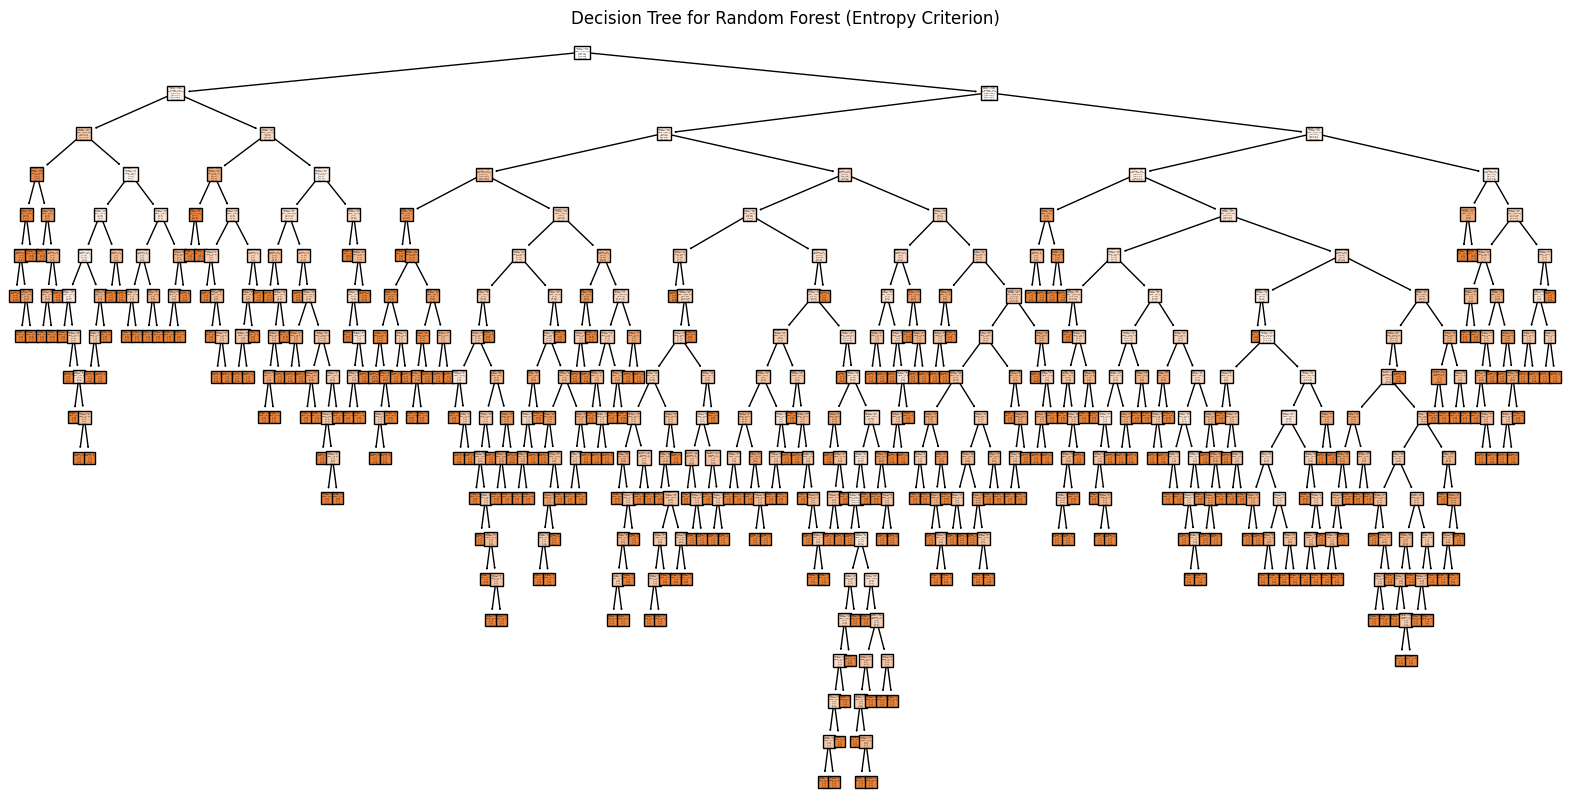

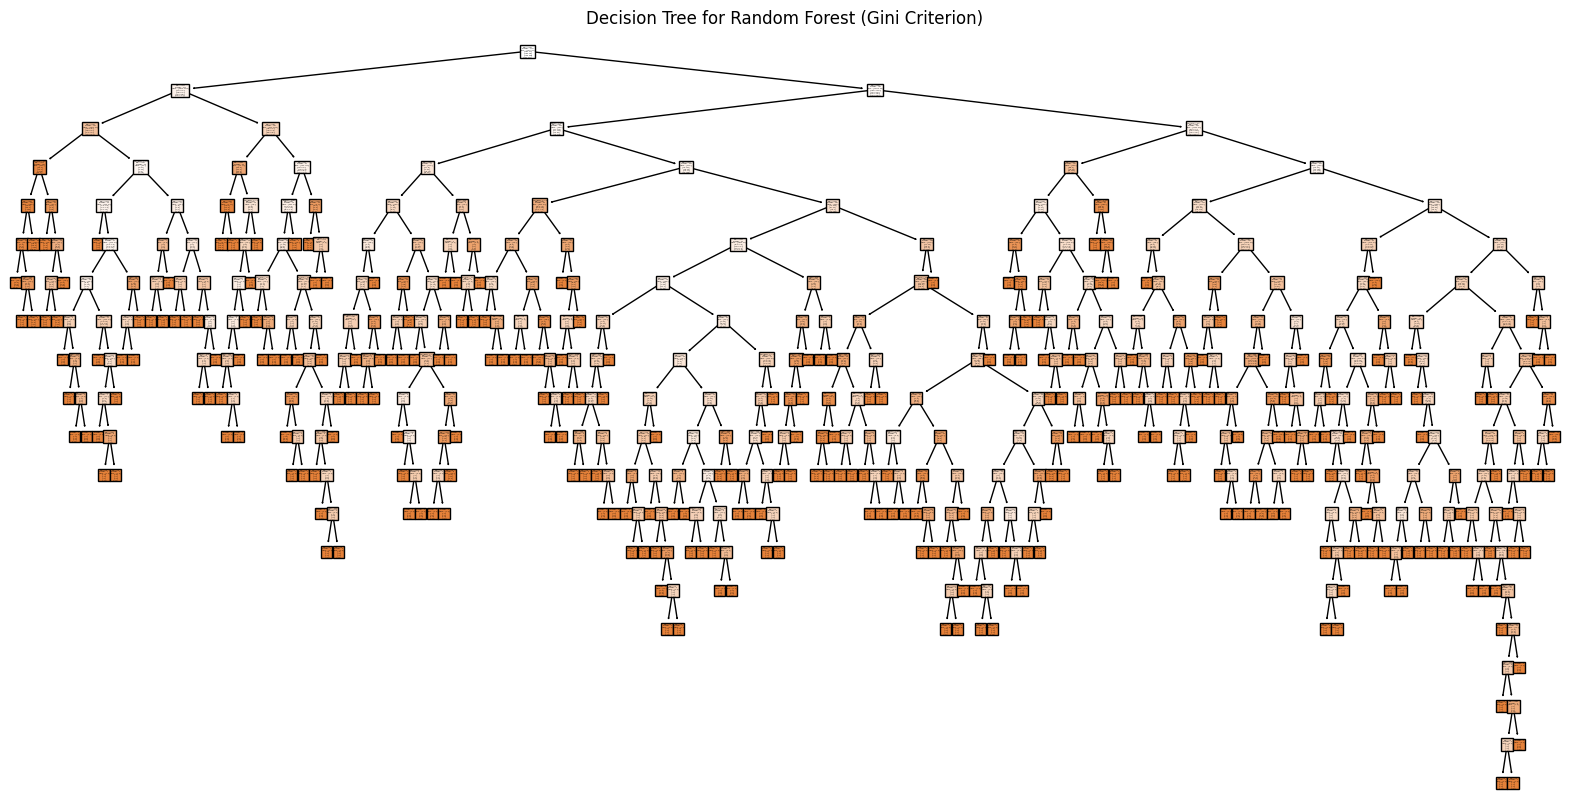

In [ ]:
# พล็อต Decision Tree สำหรับ entropy
plt.figure(figsize=(20, 10))
plot_tree(best_entropy_model.estimators_[0], feature_names=X_train_ontHot.columns, class_names=list(map(str, best_entropy_model.classes_)), filled=True)  # แปลงคลาสเป็น str ก่อนรวม
plt.title("Decision Tree for Random Forest (Entropy Criterion)")
plt.show()

# พล็อต Decision Tree สำหรับ gini
plt.figure(figsize=(20, 10))
plot_tree(best_gini_model.estimators_[0], feature_names=X_train_ontHot.columns, class_names=list(map(str, best_entropy_model.classes_)), filled=True)  # แปลงคลาสเป็น str ก่อนรวม
plt.title("Decision Tree for Random Forest (Gini Criterion)")
plt.show()

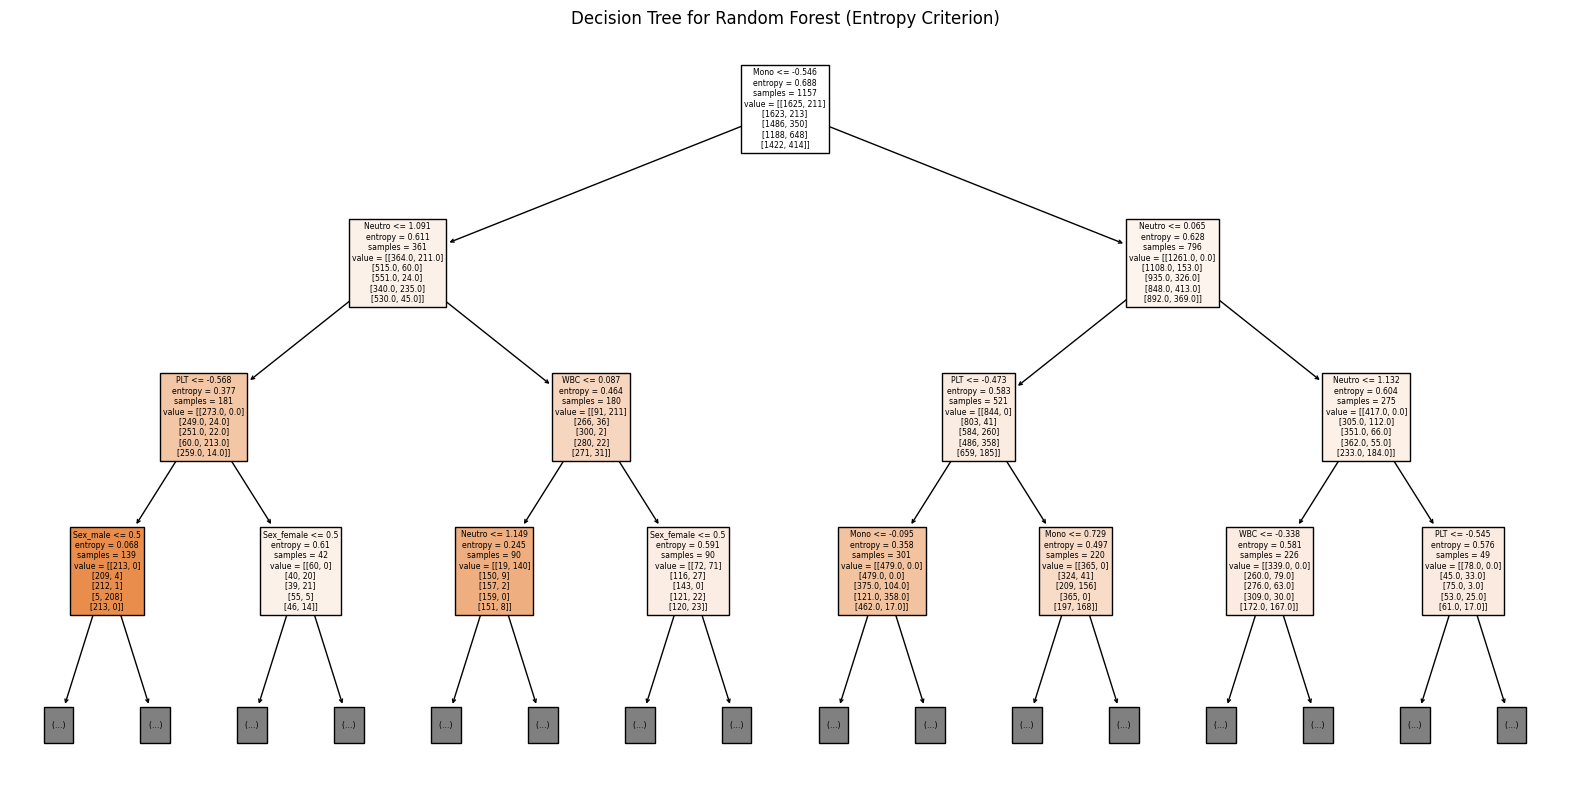

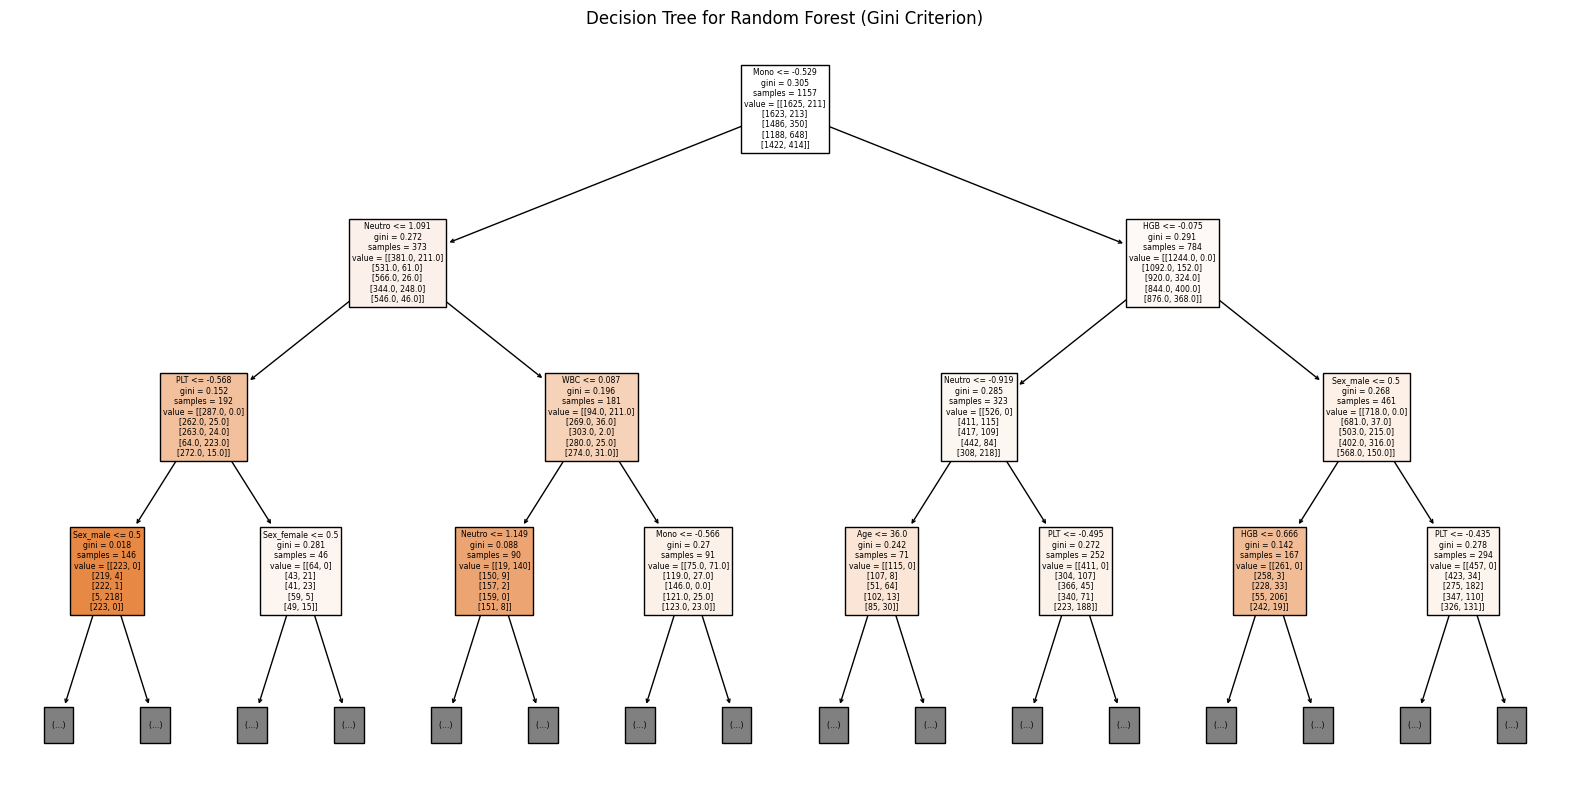

In [ ]:
# พล็อต Decision Tree สำหรับ entropy
plt.figure(figsize=(20, 10))
plot_tree(best_entropy_model.estimators_[0], feature_names=X_train_ontHot.columns, class_names=list(map(str, best_entropy_model.classes_)), filled=True, max_depth=3)  # แปลงคลาสเป็น str ก่อนรวม
plt.title("Decision Tree for Random Forest (Entropy Criterion)")
plt.show()


# พล็อต Decision Tree สำหรับ gini
plt.figure(figsize=(20, 10))
plot_tree(best_gini_model.estimators_[0], feature_names=X_train_ontHot.columns, class_names=list(map(str, best_entropy_model.classes_)), filled=True, max_depth=3)  # แปลงคลาสเป็น str ก่อนรวม
plt.title("Decision Tree for Random Forest (Gini Criterion)")
plt.show()

------

------

In [47]:
import pickle

In [25]:

with open('best_entropy_model.pkl', 'wb') as f:
    pickle.dump(best_entropy_model, f)
    
with open('best_gini_model.pkl', 'wb') as f:
    pickle.dump(best_gini_model, f)

# To load the model later
#with open('saved_model.pkl', 'rb') as f:
#    loaded_model = pickle.load(f)

------

------

MLP

In [40]:
### START CODE HERE ###
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the MLP classifier with hidden_layer_sizes=(10, 10)
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 128,256,256,512),max_iter=10000000)

# Train the MLP model
mlp_model.fit(X_train_ontHot, y_train_ontHot)

# Test the MLP model
y_pred_mlp = mlp_model.predict(X_test_ontHot)

# Calculate accuracy score
accuracy_mlp = accuracy_score(y_test_ontHot, y_pred_mlp)
print("Accuracy Score:", accuracy_mlp)


# Classification report
print("Classification Report:")
print(classification_report(y_test_ontHot, y_pred_mlp,zero_division=1))



### END CODE HERE ###

Accuracy Score: 0.8058375634517766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        87
           1       0.65      0.60      0.62        92
           2       0.73      0.84      0.78       165
           3       0.96      0.98      0.97       244
           4       0.78      0.66      0.71       200

   micro avg       0.83      0.82      0.83       788
   macro avg       0.82      0.81      0.81       788
weighted avg       0.83      0.82      0.82       788
 samples avg       0.84      0.82      0.82       788



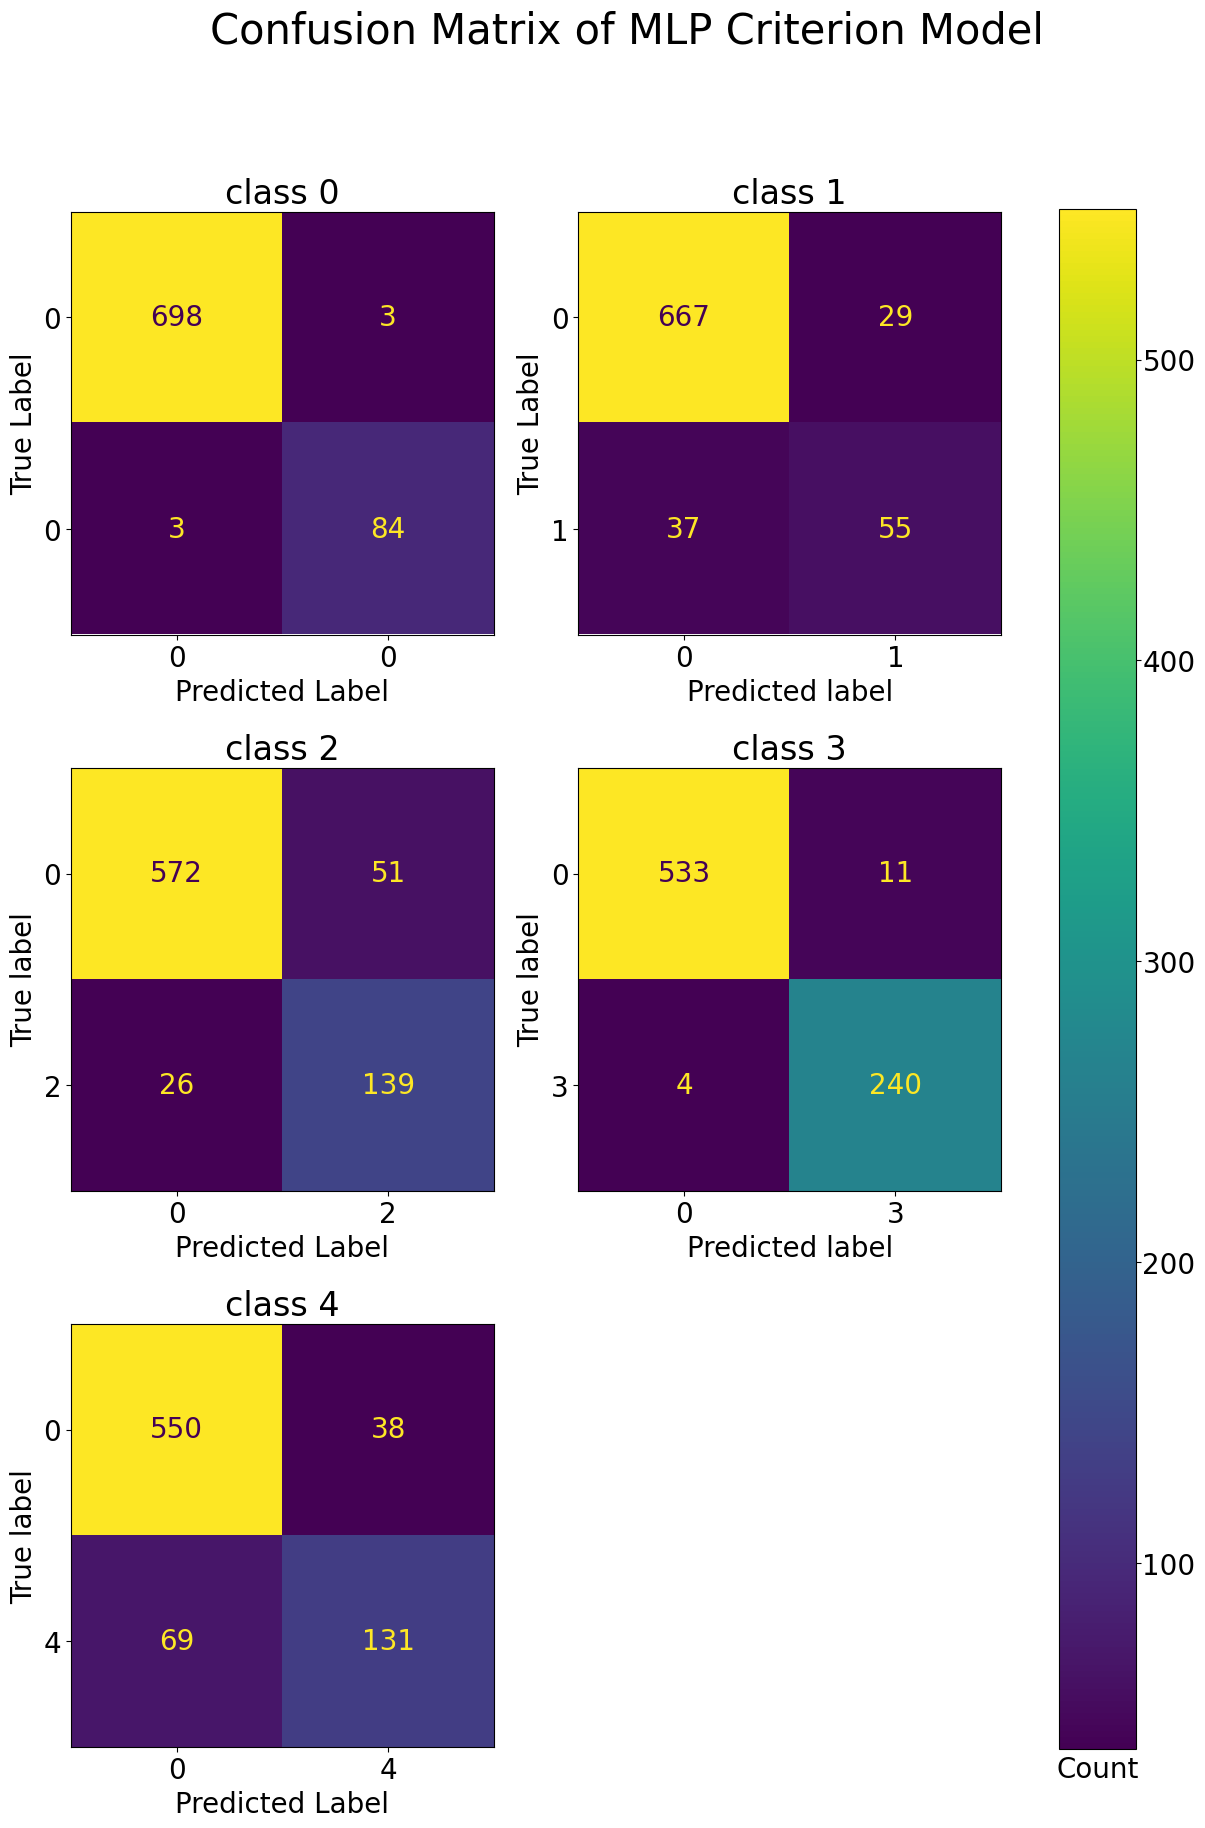

In [46]:

# สร้าง subplot ในขนาดที่เหมาะสม
fig, axes = plt.subplots(3, 2, figsize=(15, 20))

# เรียงลำดับ axes ให้อยู่ในรูปแบบแถว-คอลัมน์
axes = axes.ravel()

# ตั้งค่า font size เริ่มต้น
plt.rcParams['font.size'] = 20
# วน loop ในรูปแบบแถวและคอลัมน์
for i, ax in enumerate(axes):
    # ตรวจสอบว่าเลขรูปที่ i มีอยู่ในขอบเขตข้อมูลหรือไม่
    if i < y_test_npArray.shape[1]:
        # เลือกชุดข้อมูลที่ i และทำนาย
        y_test_class_i = y_test_npArray[:, i]
        y_pred_class_i = y_pred_mlp[:, i]

        # สร้าง confusion matrix สำหรับชุดข้อมูลที่ i
        disp = ConfusionMatrixDisplay(
            confusion_matrix(y_test_class_i, y_pred_class_i), display_labels=[0, i]
        )
        # พล็อต confusion matrix ลงใน subplot ที่เซ็ตไว้
        disp.plot(ax=ax, values_format=".4g")
        # ตั้งชื่อสำหรับแต่ละ subplot
        ax.set_title(f"class {i}")
        # ตั้งชื่อแกน x เฉพาะสำหรับรูปที่อยู่บนสุดของแต่ละคอลัมน์
        if i % 2 == 0:
            ax.set_xlabel("Predicted Label")
        # ตั้งชื่อแกน y เฉพาะสำหรับรูปที่อยู่บนสุดของแต่ละแถว
        if i < 2:
            ax.set_ylabel("True Label")
        # ลบ colorbar ทิ้ง
        disp.im_.colorbar.remove()
    else:
        # ถ้าไม่มีข้อมูลให้ซ่อน subplot
        ax.axis("off")

# ปรับแต่งระยะห่างระหว่าง subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.suptitle("Confusion Matrix of MLP Criterion Model ", fontsize=30)
# เพิ่ม colorbar ที่ตำแหน่งของ subplot ล่างขวา
cbar = fig.colorbar(disp.im_, ax=axes)
cbar.ax.set_xlabel('Count', fontsize=20)  # ตั้งชื่อ colorbar
cbar.ax.tick_params(pad=1)  # ปรับระยะห่างระหว่าง colorbar กับ subplot
plt.show()


----

---

In [49]:

with open('mlp_model.pkl', 'wb') as f:
    pickle.dump(mlp_model, f)
    

# To load the model later
#with open('saved_model.pkl', 'rb') as f:
#    loaded_model = pickle.load(f)

----